# CA3 CAP776
# Assignment Task 2 on Covid-19 dataset India

# Name : Upendra Sachan
# Regd. no. :11606896


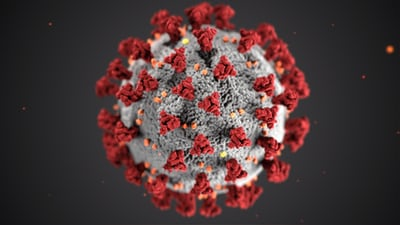

In [2]:
import pandas as pd
import numpy as np

In [3]:
india_covid_19 = pd.read_csv('covid_19_india.csv')
hospital_beds = pd.read_csv('HospitalBedsIndia.csv')
individual_details = pd.read_csv('IndividualDetails.csv')
ICMR_details = pd.read_csv('ICMRTestingDetails.csv')
ICMR_labs = pd.read_csv('ICMRTestingLabs.csv')
state_testing = pd.read_csv('StatewiseTestingDetails.csv')
population = pd.read_csv('population_india_census2011.csv')

In [4]:

hospital_beds =hospital_beds.drop([36])
cols_object = list(hospital_beds.columns[2:8])

for cols in cols_object:
    hospital_beds[cols] = hospital_beds[cols].astype(int,errors = 'ignore')

In [5]:
 top_10_primary =hospital_beds.sort_values('NumPrimaryHealthCenters_HMIS').groupby('NumPrimaryHealthCenters_HMIS').head(10)
top_10_community = hospital_beds.sort_values('NumCommunityHealthCenters_HMIS').groupby('NumCommunityHealthCenters_HMIS').head(10)
top_10_district_hospitals = hospital_beds.sort_values('NumDistrictHospitals_HMIS').groupby('NumDistrictHospitals_HMIS').head(10)
top_10_public_facility = hospital_beds.sort_values('TotalPublicHealthFacilities_HMIS').groupby('TotalPublicHealthFacilities_HMIS').head(10)
top_10_public_beds = hospital_beds.sort_values('NumPublicBeds_HMIS').groupby('NumPublicBeds_HMIS').head(10)

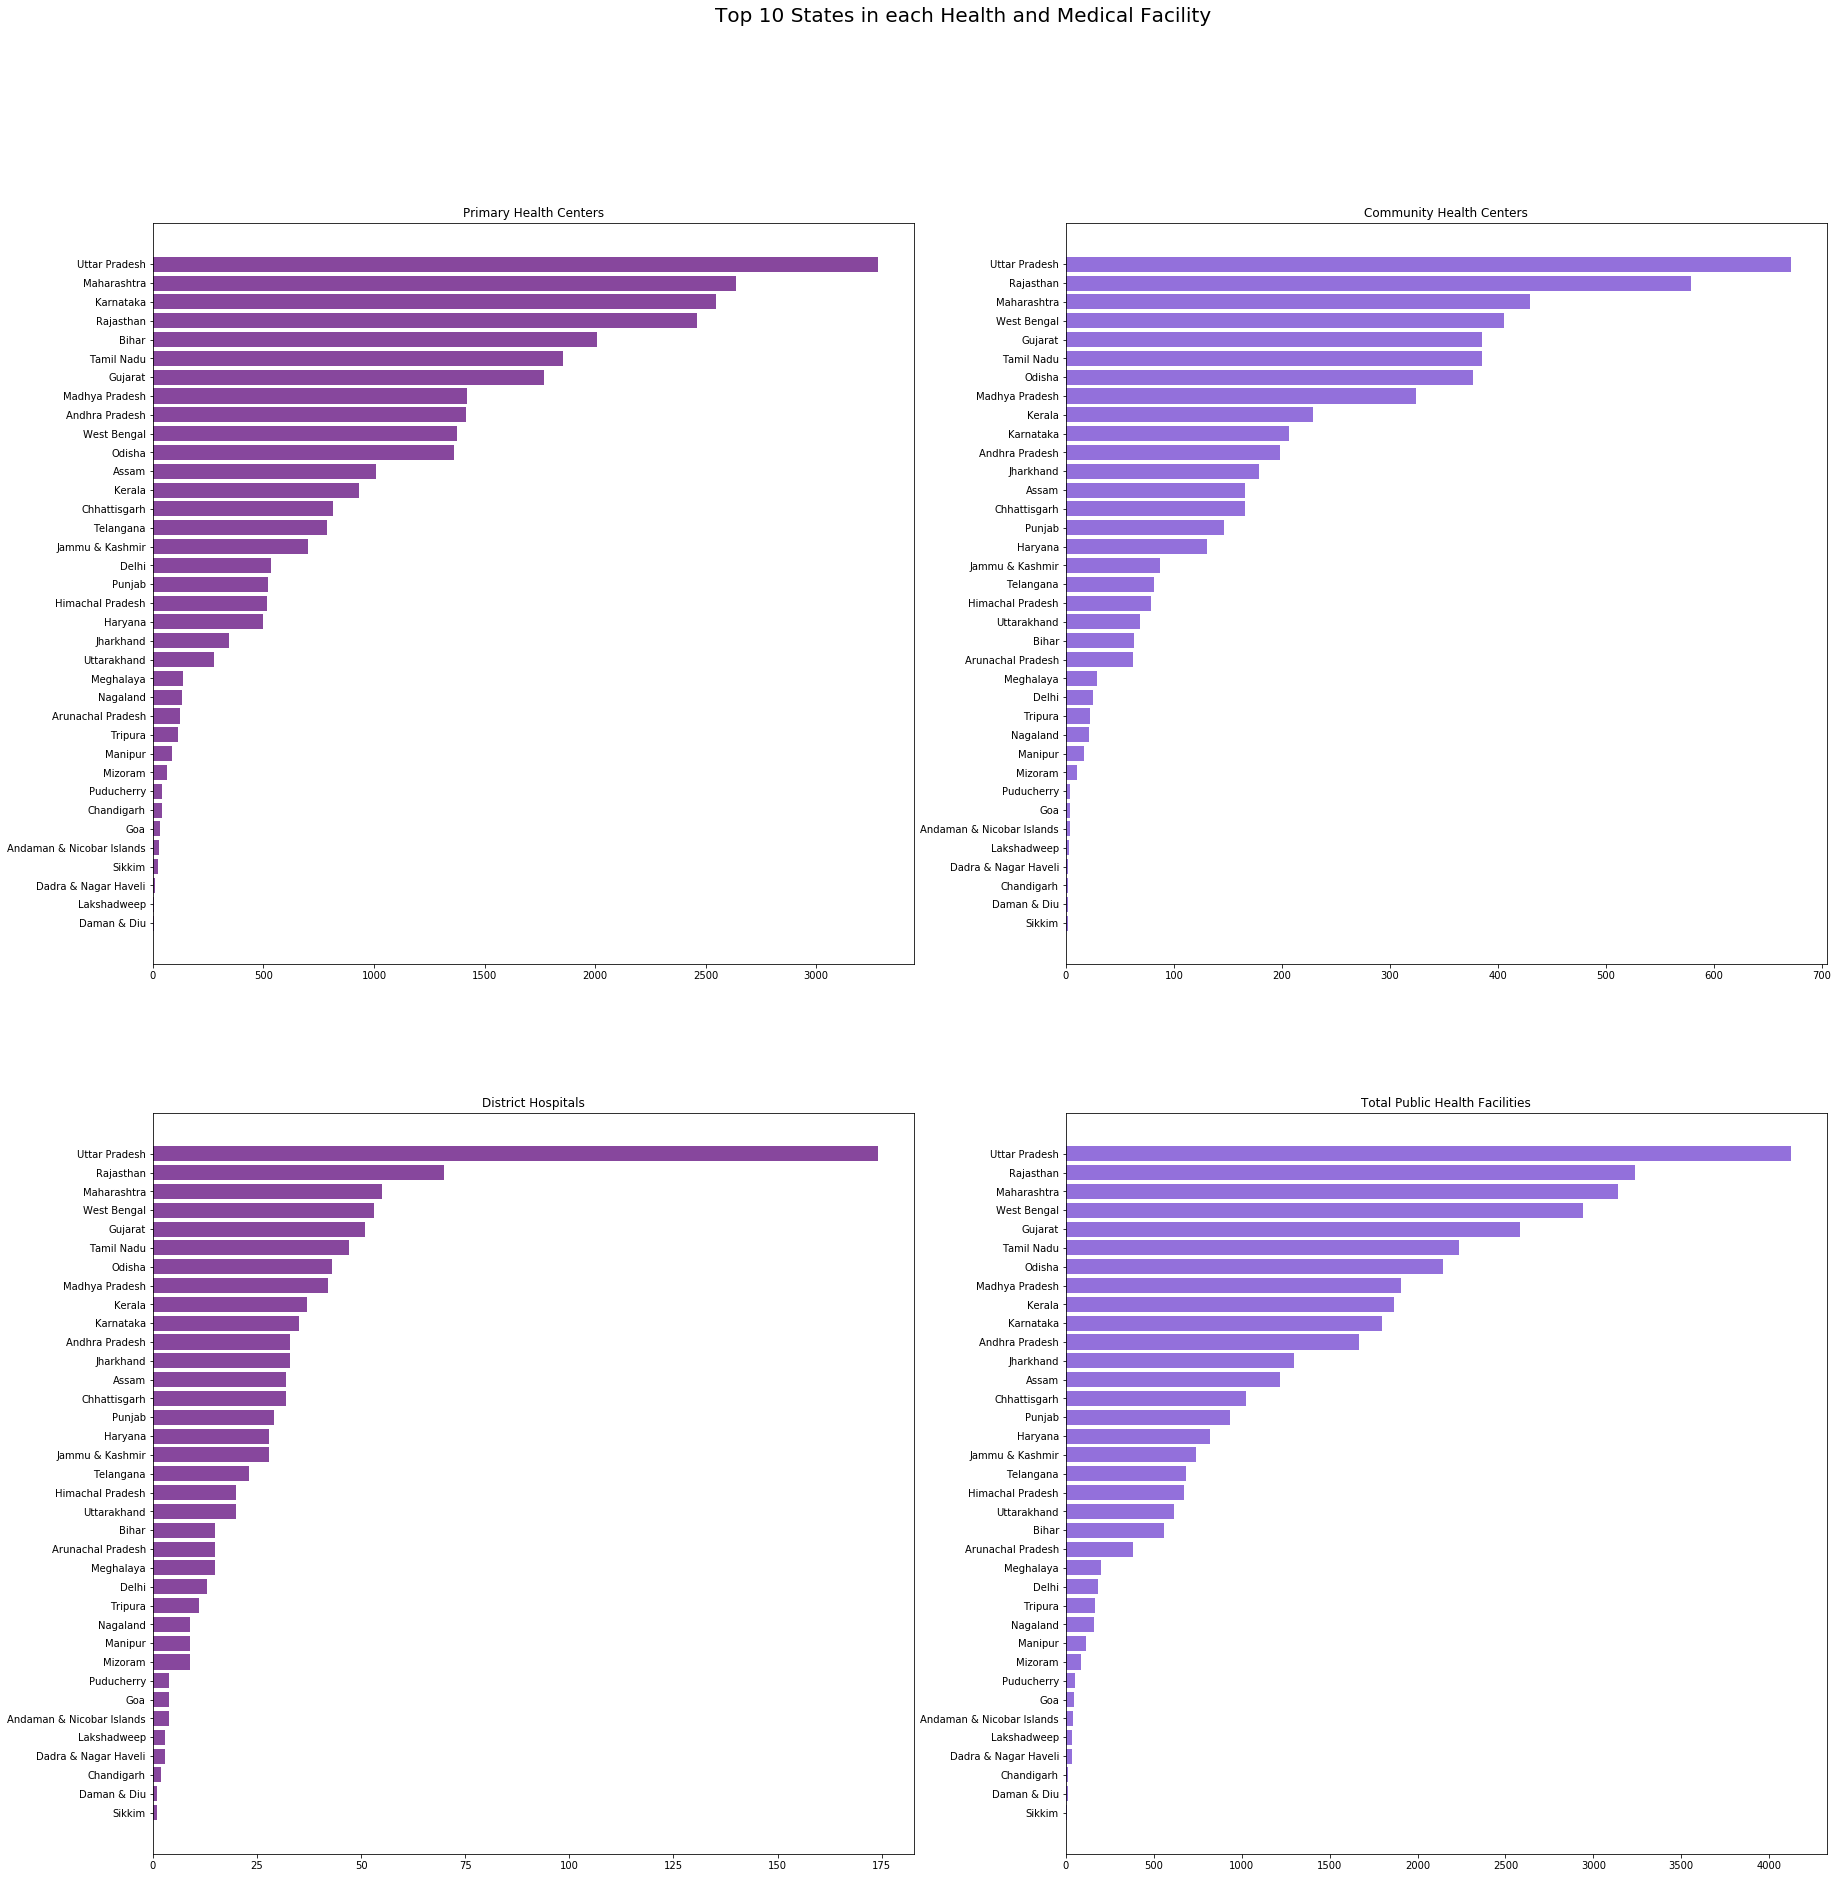

In [18]:
top_10_primary.dropna(how='all')
top_10_community.dropna(how='all')
top_10_district_hospitals.dropna(how='all')
top_10_public_facility.dropna(how='all')
top_10_public_beds.dropna(how='all')

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

plt.figure(figsize=(30,30))
plt.suptitle('Top 10 States in each Health and Medical Facility',fontsize=20)
plt.subplot(221)
plt.title('Primary Health Centers')
plt.barh(top_10_primary['State/UT'].dropna(),top_10_primary['NumPrimaryHealthCenters_HMIS'].dropna(),color ='#87479d');

plt.subplot(222)
plt.title('Community Health Centers')
plt.barh(top_10_community['State/UT'].dropna(),top_10_community['NumCommunityHealthCenters_HMIS'].dropna(),color = '#9370db');

plt.subplot(224)
plt.title('Total Public Health Service & Facilities')
plt.barh(top_10_community['State/UT'].dropna(),top_10_public_facility['TotalPublicHealthFacilities_HMIS'].dropna(),color='#9370db');

plt.subplot(223)
plt.title('District Hospitals')
plt.barh(top_10_community['State/UT'].dropna(),top_10_district_hospitals['NumDistrictHospitals_HMIS'].dropna(),color = '#87479d');


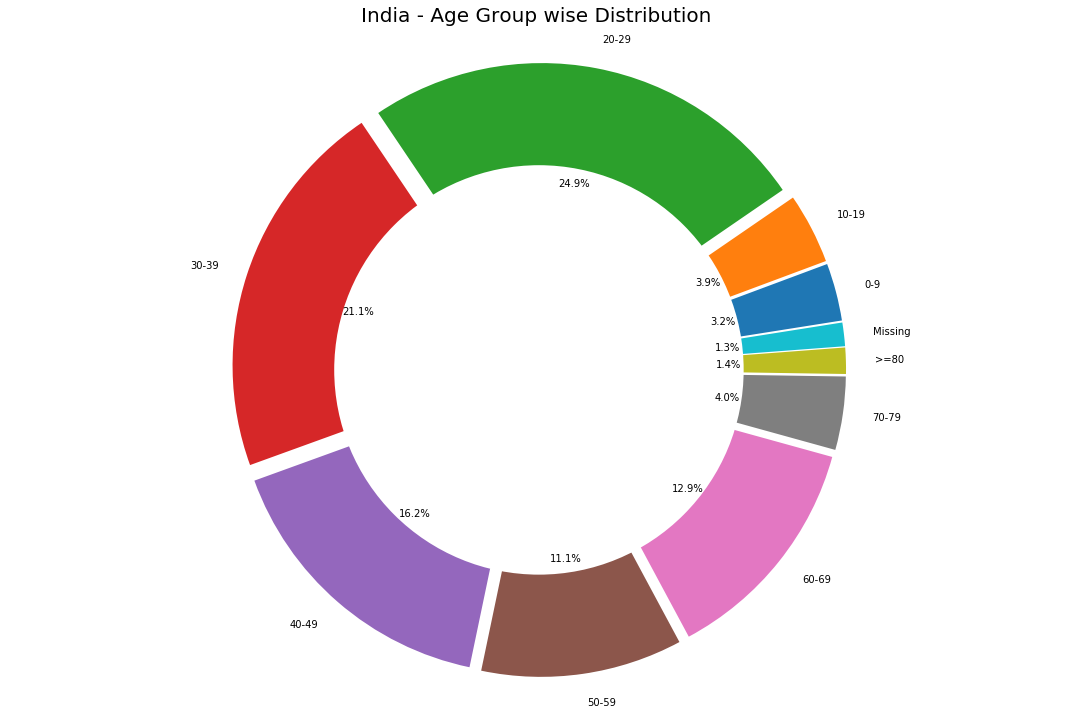

In [10]:

age_details = pd.read_csv('AgeGroupDetails.csv')
labels = list(age_details['AgeGroup'])
sizes = list(age_details['TotalCases'])

explode = []

for i in labels:
    explode.append(0.05)
    
plt.figure(figsize= (15,10))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode)
centre_circle = plt.Circle((0,0),0.70,fc='white')

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('India - Age Group wise Distribution',fontsize = 20)
plt.axis('equal')  
plt.tight_layout()

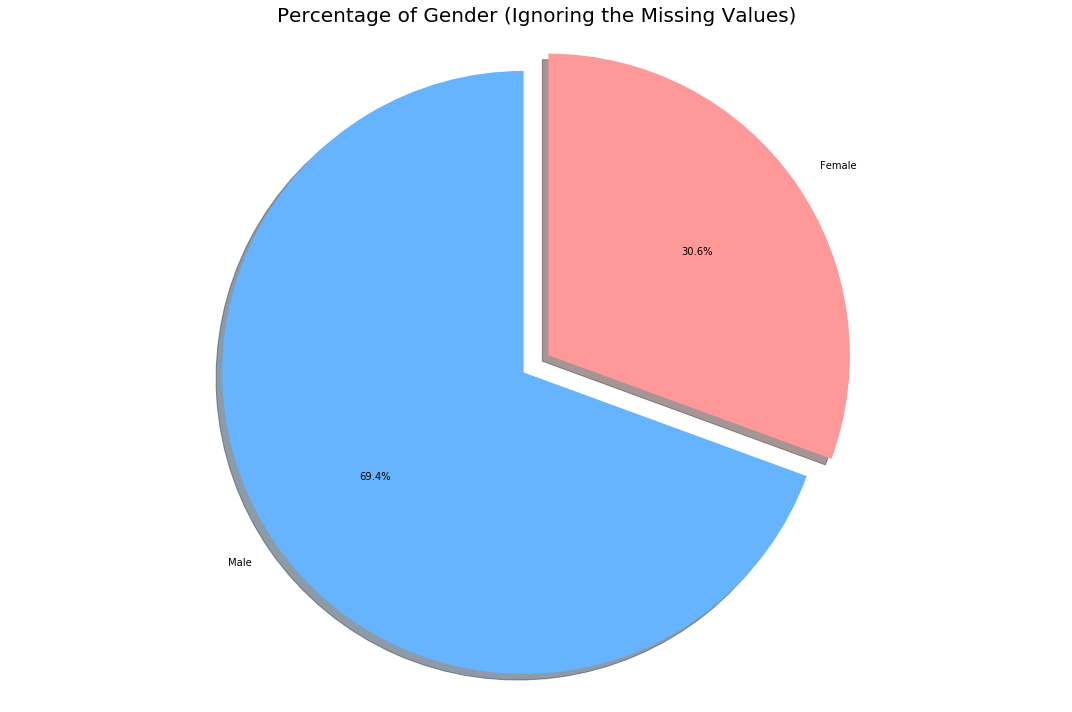

In [11]:
labels = ['Male', 'Female']
sizes = []
sizes.append(list(individual_details['gender'].value_counts())[0])
sizes.append(list(individual_details['gender'].value_counts())[1])

explode = (0.1, 0)
colors = ['#66b3ff','#ff9999']

plt.figure(figsize= (15,10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)

plt.title('Percentage of Gender (Ignoring the Missing Values)',fontsize = 20)
plt.axis('equal')
plt.tight_layout()


In [17]:
state_cases = india_covid_19.groupby('State/UnionTerritory')['Confirmed','Deaths','Cured'].max().reset_index()
state_cases['Active'] = state_cases['Confirmed'] - (state_cases['Deaths']- state_cases['Cured'])
state_cases["Death Rate (per 100)"] = np.round(100*state_cases["Deaths"]/state_cases["Confirmed"],2)
state_cases["Cure Rate (per 100)"] = np.round(100*state_cases["Cured"]/state_cases["Confirmed"],2)
state_cases.sort_values('Confirmed', ascending= False).fillna(0).style.background_gradient(cmap='Blues',subset=["Confirmed"])\
                        .background_gradient(cmap='Blues',subset=["Deaths"])\
                        .background_gradient(cmap='Blues',subset=["Cured"])\
                        .background_gradient(cmap='Blues',subset=["Active"])\
                        .background_gradient(cmap='Blues',subset=["Death Rate (per 100)"])\
                        .background_gradient(cmap='Blues',subset=["Cure Rate (per 100)"])


,State/UnionTerritory,Confirmed,Deaths,Cured,Active,Death Rate (per 100),Cure Rate (per 100)
18,Maharashtra,2919,187,295,3027,6.41,10.11
7,Delhi,1578,32,42,1588,2.03,2.66
28,Tamil Nadu,1242,14,118,1346,1.13,9.5
17,Madhya Pradesh,1120,53,64,1131,4.73,5.71
27,Rajasthan,1023,3,147,1167,0.29,14.37
9,Gujarat,871,36,64,899,4.13,7.35
32,Uttar Pradesh,773,13,68,828,1.68,8.8
29,Telengana,698,18,120,800,2.58,17.19
1,Andhra Pradesh,534,14,20,540,2.62,3.75
15,Kerala,388,3,218,603,0.77,56.19


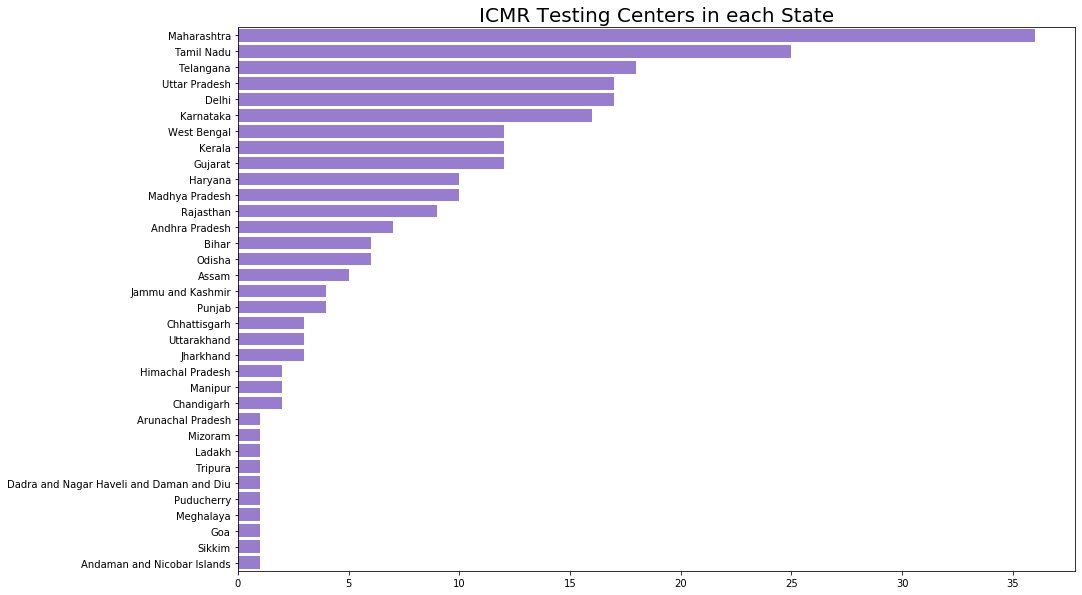

In [13]:
values = list(ICMR_labs['state'].value_counts())
names = list(ICMR_labs['state'].value_counts().index)

plt.figure(figsize=(15,10))
sns.set_color_codes("pastel")
plt.title('ICMR Testing Centers in each State', fontsize = 20)
sns.barplot(x= values, y= names,color = '#9370db');

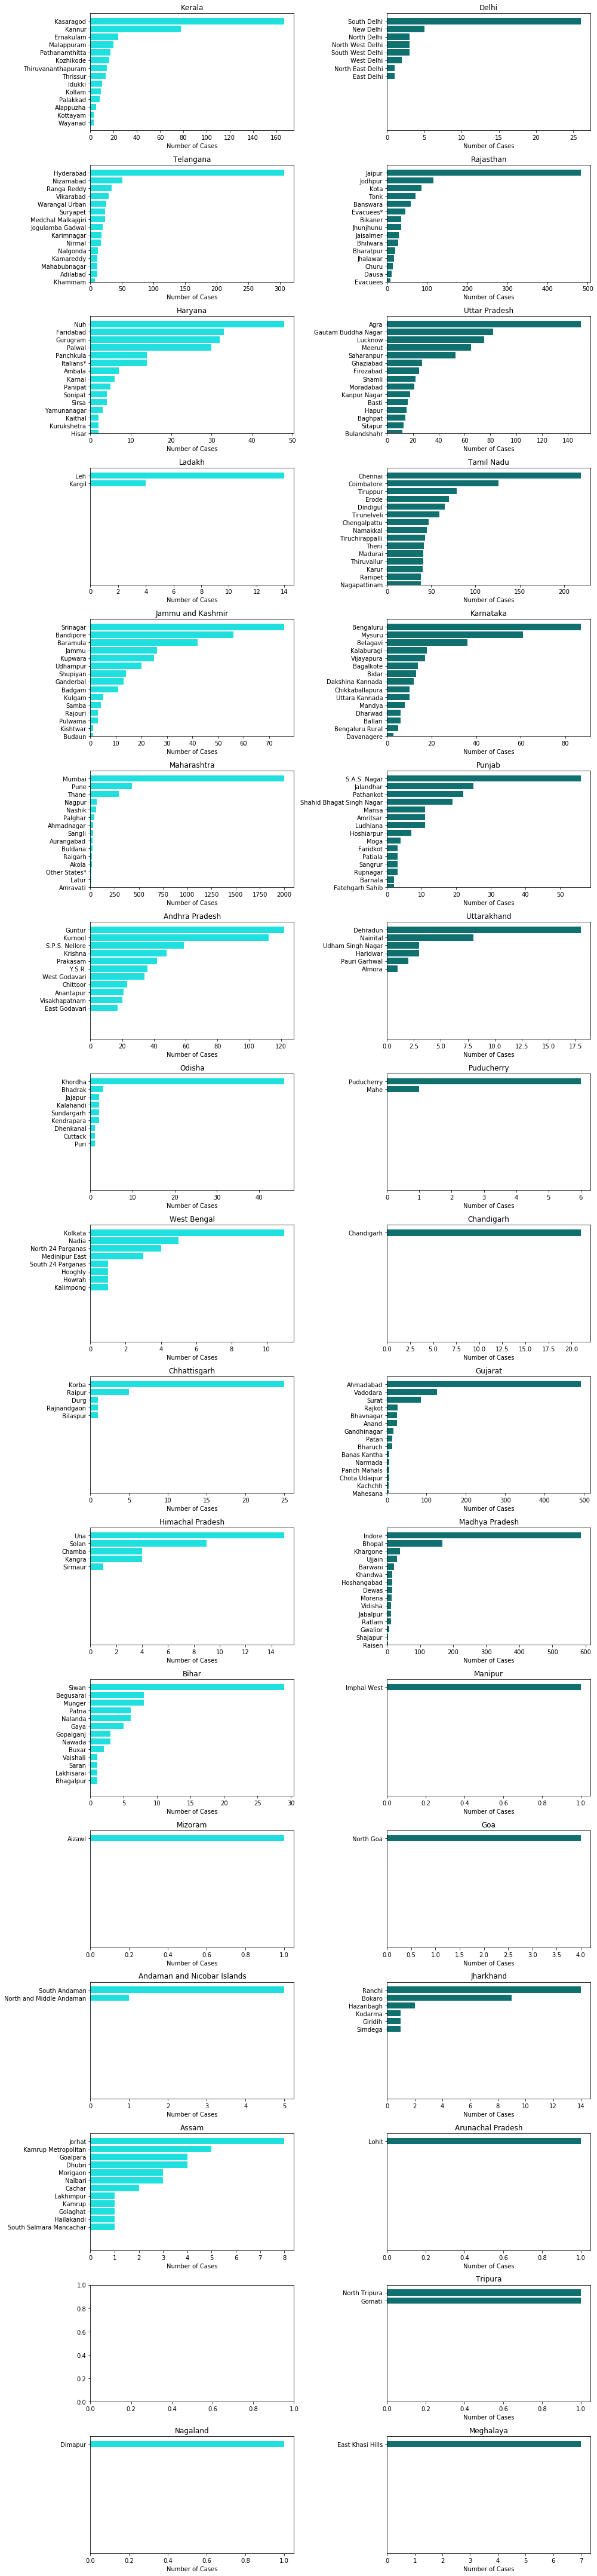

In [19]:
colors_list = ['cyan','teal']
states = individual_details['detected_state'].unique()
if len(states)%2==0:
    n_rows = int(len(states)/2)
else:
    n_rows = int((len(states)+1)/2)    
plt.figure(figsize=(14,60))

for idx,state in enumerate(states):    
    plt.subplot(n_rows,2,idx+1)
    y_order = individual_details[individual_details['detected_state']==state]['detected_district'].value_counts().index
    try:
        g = sns.countplot(data=individual_details[individual_details['detected_state']==state],y='detected_district',orient='v',color=colors_list[idx%2],order=y_order)
        plt.xlabel('Number of Cases')
        plt.ylabel('')
        plt.title(state)
        plt.ylim(14,-1)
    except:
        pass
plt.tight_layout()
plt.show()